In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/nhanes_2015_2016.csv')
print(df)

       SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0     83732     1.0     NaN     1.0       1         1        62         3   
1     83733     1.0     NaN     6.0       1         1        53         3   
2     83734     1.0     NaN     NaN       1         1        78         3   
3     83735     2.0     1.0     1.0       2         2        56         3   
4     83736     2.0     1.0     1.0       2         2        42         4   
...     ...     ...     ...     ...     ...       ...       ...       ...   
5730  93695     2.0     2.0     NaN       1         2        76         3   
5731  93696     2.0     2.0     NaN       2         1        26         3   
5732  93697     1.0     NaN     1.0       1         2        80         3   
5733  93700     NaN     NaN     NaN       1         1        35         3   
5734  93702     1.0     NaN     2.0       2         2        24         3   

      DMDCITZN  DMDEDUC2  ...  BPXSY2  BPXDI2  BMXWT  BMXHT  BMXBMI  BMXLEG

In [4]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [5]:
df.shape

(5735, 28)

In [6]:
df['RIDAGEYR']

0       62
1       53
2       78
3       56
4       42
        ..
5730    76
5731    26
5732    80
5733    35
5734    24
Name: RIDAGEYR, Length: 5735, dtype: int64

In [7]:
df['RIDAGEYR'].size

5735

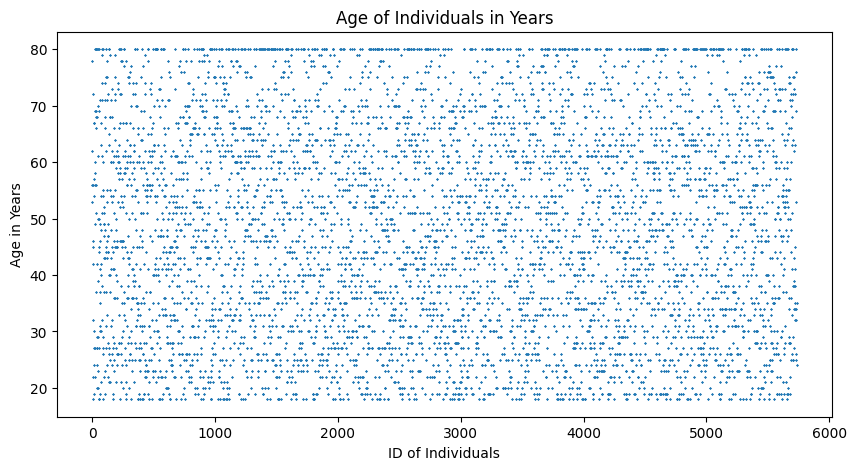

In [8]:
# create a figure
plt.figure(figsize=(10, 5))

x =  range(df['RIDAGEYR'].size)
y =  df['RIDAGEYR']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Age of Individuals in Years")
plt.xlabel("ID of Individuals")
plt.ylabel("Age in Years")

plt.show()

In [9]:
mean=df['RIDAGEYR'].mean()
print(mean)

48.05231037489102


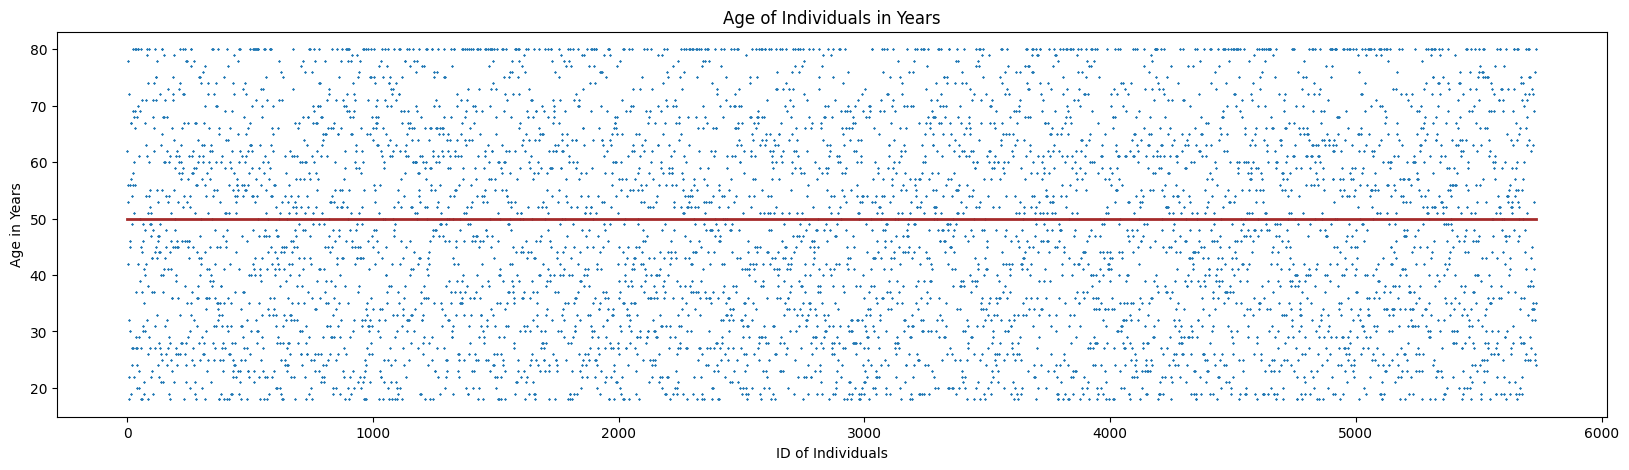

In [10]:
# create a figure

plt.figure(figsize=(20, 5))

x =  range(df['RIDAGEYR'].size)
y =  df['RIDAGEYR']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Age of Individuals in Years")
plt.xlabel("ID of Individuals")
plt.ylabel("Age in Years")

# plot the estimate line
a , b = ([0, 5735], [50,50])
plt.plot(a, b, color='brown', linewidth=2)

plt.show()

In [11]:
mean=sum(df['RIDAGEYR']/len(df['RIDAGEYR']))
print(mean)

48.05231037489092


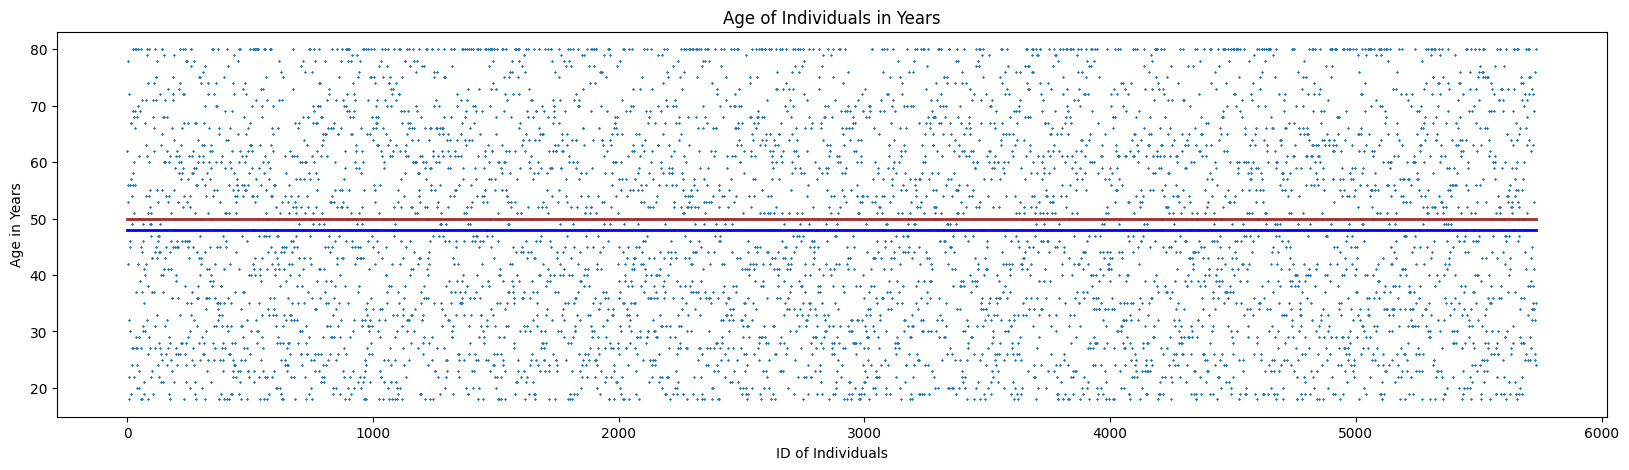

In [12]:
# create a figure

plt.figure(figsize=(20, 5))

x =  range(df['RIDAGEYR'].size)
y =  df['RIDAGEYR']

plt.scatter(x, y, marker='x', s=0.5)

plt.title("Age of Individuals in Years")
plt.xlabel("ID of Individuals")
plt.ylabel("Age in Years")

# plot the estimate line
a , b = ([0, 5735], [50,50])
plt.plot(a, b, color='brown', linewidth=2)

# plot the estimate line
a, b = ([0, 5735], [y.mean(), y.mean()])
plt.plot(a, b, color='blue', linewidth=2)

plt.show()

In [13]:
y.median()

48.0

In [14]:
y.min()

18

In [15]:
y.max()

80

In [16]:
#Finding Q1
Q1 = np.percentile(df.RIDAGEYR ,25)
print(Q1)

32.0


In [17]:
#Finding Q3
Q3 = np.percentile(df.RIDAGEYR,75)
print(Q3)

63.0


In [18]:
#Finding Inter Quartile Range
IQR = Q3 - Q1
print(IQR)

31.0


In [19]:
#Finding variance
var= np.var(df['RIDAGEYR'])
print(var)

339.64294801875025


In [20]:
#Finding standard deviation
std_dev= np.sqrt(var)
print(std_dev)

18.42940444015352


In [21]:
#Finding the cofficant of variance
cv=(std_dev/mean)*100
print(cv)

38.35279572693252


In [22]:
lower_bound= Q1-1.5* IQR
print(lower_bound)
upper_bound= Q3+1.5* IQR
print(upper_bound)

-14.5
109.5


In [27]:
outliers = df[(df['RIDAGEYR'] < lower_bound) | (df['RIDAGEYR'] > upper_bound)]['RIDAGEYR']
print("These values are outliers:")
print(outliers)
print("Number of outliers:", outliers.count())

These values are outliers:
Series([], Name: RIDAGEYR, dtype: int64)
Number of outliers: 0


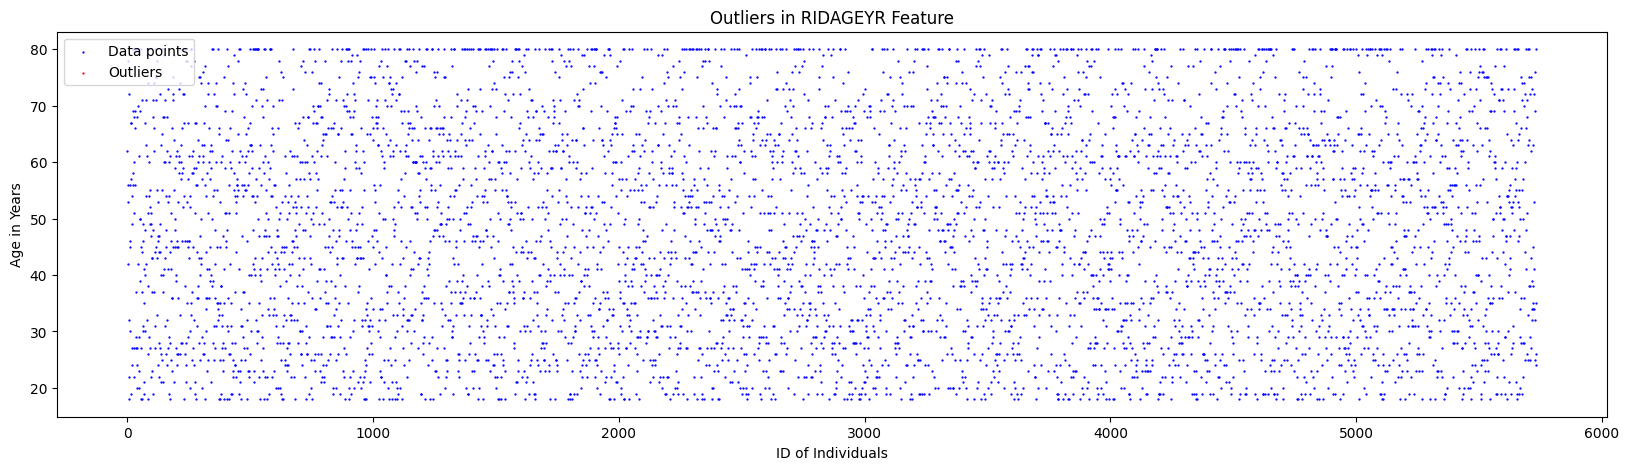

In [29]:
# Plotting the actual data points and outliers
plt.figure(figsize=(20, 5))

x =  range(df['RIDAGEYR'].size)
y =  df['RIDAGEYR']

plt.scatter(df['RIDAGEYR'].index, df['RIDAGEYR'] , color='blue', label='Data points' , s=0.4)
plt.scatter(outliers.index, outliers, color='red', label='Outliers',s=0.4)

plt.title('Outliers in RIDAGEYR Feature')
plt.xlabel('ID of Individuals')
plt.ylabel('Age in Years')
plt.legend()
plt.show()


**Since the data, I choose have no outliers...................**